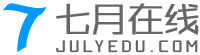


# 七月在线 《Python基础入门 第三期》 第五课 函数（下）


> [七月在线](https://www.julyedu.com) David@2018-12-15

## 本节课程目标
### 复习上节课内容
### 函数式编程思想
### 匿名函数
### 高阶函数与内置高阶函数map,reduce,filter,sorted
### 嵌套函数与函数闭包，函数对象
### Python名字访问规则：LEGB
### 装饰器
### 完成课后作业：

## 函数式编程思想

- 函数是第一等公民First Class
  - 函数式编程是一种编程范式，是如何编写程度的方法论。
  - 把运算过程尽量变成一系列函数的调用。属于结构化编程
   
  
- 特点：
  - 允许函数作为参数，传入另一个函数
  - 返回一个函数

In [2]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

## 匿名函数

In [ ]:
type(lambda a,b:a-b)
#定义，lambda
#函数体不用写return

a=5
b=7
lambda1=lambda name1:name1**2
lambda1(a)

## 高阶函数

In [8]:
#一切皆object
#function is a object,or not?
#给已有的函数添加功能
def myfun1():
    pass


#什么是高阶函数:能接近其它函数作用参数函数

### Python内置高阶函数

In [ ]:
#map,reduce,filter
l1=[1,2,3,4,5,6,7]
l2=[7,8,9,10,11,12,13]

list(map(lambda x:x**3,l1))

list(map(lambda x,y:x+y,l1,l2))

a=list(map(lambda x,y:x+y,l1,l1))
print("a:",a)


list(map(lambda x,y:x+y,l1,l2))

#Reduce
from functools import reduce
def func1(a,b):
    return a-b

reduce(func1,l1)


## filter

list(filter(lambda x:True if x<3 else False,l1))

## 嵌套函数与函数闭包

In [ ]:
#__closure__#新建闭包函数等于新建函数+附加自由变量
#函数编译过程中内部函数会有一个闭包的特殊属性__closure__(func_closure)。__closure__属性是一个由cell对象组成的元组，包含了由多个作用域引用的变量
def outter():
    name='jack'#定义了，被下层函数使用
    age=24#定义了，被下层函数使用
    address='BJ'#定义了，被下层函数做返回值
    hobbie='fishing'#定义了但未被本函数和下层函数使用
    
    def inner1():
        new_name=name[0:3]
        new_age+=age
        inner1_l=locals()
        inner1_g=globals()
        return address,inner1_l#使用outer的
    return inner1
inner1 = outter()

##### 延伸阅读:函数对象PyFunctionObject与代码对象PyCodeObject，与PyFrameObject

```
__code__#字节码对象
__closure__#函数对象，___closure__属性是一个由cell对象组成的元组，包含了由多个作用域引用的变量,涉及闭包
```

In [10]:
inner1=outter()

inner1.__name__
inner1.__code__.co_freevars,inner1.__closure__,inner1.__code__.co_nlocals # inner1函数内局部变量数

'inner1'

(('address', 'age', 'name'),
 (<cell at 0x000001BC7A0E6048: str object at 0x000001BC7A0DFDC0>,
  <cell at 0x000001BC7A0E62B8: int object at 0x0000000062116F20>,
  <cell at 0x000001BC7A0E6378: str object at 0x000001BC7A0DF688>),
 4)

## Python名字访问规则：LEGB

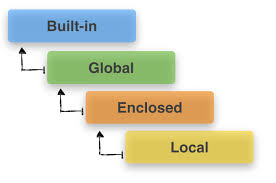

In [ ]:
#而每当进入一个函数时，就会新产生一个locals()
g_1='global value in Global'

def func1():
    print(locals() is globals())#此时的loclas()就仅指func1内
    func1_name='local values in func1'
    print('locals in func1: ', locals())
    return locals() is globals()

# func1()


In [ ]:
#分别定义位于LEGB四个不同作用的，相同名字value1的变量

__builtins__.value1='B value stored in __builtins__'#B
value1='G value stored in Global'#G
del value1


#而当出现嵌套函数inner时，也会新产生一个locals()，而如果inner此时还引用了在outter这个函数作用域内出现的变量时，就是闭包
def outter():
    
    value1='E value stored in enclosure'#Values store in Enclosure

    
    def inner():
        value1='L value stored in locals'
        # Can't find value1 in local
        print(value1,' referenced from outter')#此时的value1是inner1这个函数外层函数的变量
    return inner

outter()()

## 装饰器

In [ ]:
def fun1():
    print ('this is foo1 function')

def fun2():
    print ('this is foo2 function')

def fun3():
    print ('this is foo3 function')
    

#为以上三个函数添加报时功能    
import datetime

#设计一个能接收函数的函数，功能是打印时间后，然后返回接收到的函数
def outer_fun(func):
    print(datetime.datetime.now())
    return func

outer_fun(fun2)()

In [ ]:
# 使用 @ 语法糖
# @是python装饰器的简便写法，是Python的语法糖

import datetime

def outer_fun(fun):
    #do something you want here
    str1='This is string from outer'
  
    def inner():
        print(2)
        print(str1)
        print('from inner to execute:',fun.__name__)
        print('the',fun.__name__,'result:',fun())
        print('extra:',datetime.datetime.now())
      
    return inner

#装饰器语法糖在要被包裹的函数前声明。
#@后面的函数名，是把下边函数进行包裹的函数的名字outer_fun
@outer_fun#为fun1函数添加一个装饰器函数叫outer_fun
def fun1():
    return 'this is fun1 function--'

@outer_fun#为fun1函数添加一个装饰器函数，叫outer_fun
def fun2():
    return 'this is fun2 function--'

# 装饰器在Python使用如此方便都要归因于
# Python的函数能像普通的对象一样能作为参数传递给其他函数
# 可以被赋值给其他变量，可以作为返回值，可以被定义在另外一个函数内

#装饰器是AOP思想的体现。Aspect Oriented Programming（面向切面编程）
fun1()
dd=9
print(dd)
# fun2()

In [ ]:
def outer(func):
    def inner():
        print('executed:',func())
        print('shijian')
    return inner

@outer
def fun1():
    return 'this is fun1 function--'

fun1()
print(type(fun1))

## 课后作业：

### 使用reduce函数实现找出一组数字列表中的最大值
- 注意：reduce 是两两进行比较

### 求1000以内能同时被3和7整除的数有哪些。要求使用map与filter函数

### 要求使用map与filter函数，输出一个输入字符串里每个字符出现的次数

### 体现闭包的思想，创建一个三层嵌套的函数，并调用。

### 创建一个能接收不定长位置参数（数字）函数，返回是所有参数的和。
- 现要求在这个函数每次调用时都有进行屏幕打印（该函数被调用）。
- 请在不改动这个函数内部及调用的前提下实现(使用装饰器)